# Data Preprocessing

In [2]:
import keras

In [5]:
model = keras.models.Sequential()

model.add(keras.layers.Lambda(lambda x: (x/255.0)-.5, input_shape=(160,320,3)))

# Data Augmentation

## Flipping Images And Steering Measurements

(160, 320, 3)


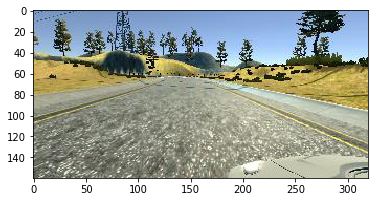

In [13]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

image = mpimg.imread('examples/left_ex.jpg')
measurement=.2

plt.imshow(image)

print(image.shape)

-0.2


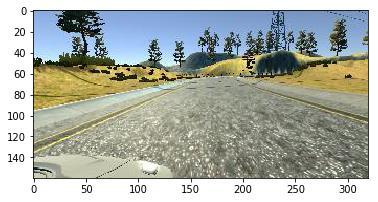

In [11]:
import numpy as np

image_flip = np.fliplr(image)
measurement_flip = -measurement

plt.imshow(image_flip)
print(measurement_flip)

## Multiple Cameras

```

with open(file, 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        steering_center = float(row[3])
        
        # create adjusted steering measruements for side camera
        steering_left=steering_center+correction
        steering_right=steering_center-correction
        
        # read in images from center, left, and right cameras
        path = "..." 
        img_center = process_image(np.asarray(mpimg.read(path+row[0])))
        img_left = process_image(np.asarray(mpimg.read(path+row[1])))
        img_right = process_image(np.asarray(mpimg.read(path+row[2])))
        
        # add images + angles to dataset
        car_images.extend(img_center, img_left, img_right)
        steering_angles.extend(steering_center, steering_left, steering_right)
        
```

# Cropping in Keras

In [17]:
model = keras.models.Sequential()

model.add(keras.layers.Cropping2D(cropping=((50, 25), (0, 0)), input_shape=(160,320,3)))

# Visualizing Loss

In [18]:
# code from previous transfer learning lab

import tensorflow as tf

inception = keras.applications.inception_v3.InceptionV3(include_top=False, input_shape=(139,139,3))
inception.trainable = False
input_data = keras.layers.Input(shape=(32,32,3))
resized_input = keras.layers.Lambda(lambda image: tf.image.resize_images(image, (139, 139)))(input_data)
incept = inception(resized_input)
pooling = keras.layers.GlobalAveragePooling2D()(incept)
fc = keras.layers.Dense(256, activation=tf.nn.relu)(pooling)
predictions = keras.layers.Dense(10, activation=tf.nn.softmax)(fc)
model = keras.models.Model(inputs=input_data, outputs=predictions)
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelBinarizer
from keras.datasets import cifar10

(X_train, y_train), (X_val, y_val) = cifar10.load_data()

label_bin = LabelBinarizer()
y_oh_train = label_bin.fit_transform(y_train)
y_oh_val = label_bin.fit_transform(y_val)

X_train, y_oh_train = shuffle(X_train, y_oh_train)
X_val, y_oh_val = shuffle(X_val, y_oh_val)

from keras.preprocessing.image import ImageDataGenerator


datagen = ImageDataGenerator(preprocessing_function=keras.applications.inception_v3.preprocess_input)
val_datagen = ImageDataGenerator(preprocessing_function=keras.applications.inception_v3.preprocess_input)

In [25]:
batch_size=128
epochs=4

history_object = model.fit_generator(datagen.flow(X_train, y_oh_train, batch_size=batch_size),
                   steps_per_epoch=len(X_train)/batch_size, epochs=epochs, verbose=1,
                   validation_data=val_datagen.flow(X_val, y_oh_val, batch_size=batch_size),
                   validation_steps=len(X_val)/batch_size)

Epoch 1/4
391/390 [==============================] - 1040s 3s/step - loss: 1.0070 - acc: 0.6642 - val_loss: 0.8486 - val_acc: 0.7155
Epoch 2/4
391/390 [==============================] - 1040s 3s/step - loss: 0.7927 - acc: 0.7295 - val_loss: 0.8223 - val_acc: 0.7193
Epoch 3/4
391/390 [==============================] - 1040s 3s/step - loss: 0.7272 - acc: 0.7476 - val_loss: 0.8094 - val_acc: 0.7234
Epoch 4/4
391/390 [==============================] - 1040s 3s/step - loss: 0.6847 - acc: 0.7594 - val_loss: 0.8022 - val_acc: 0.7262


In [26]:
print(history_object.history.keys())

dict_keys(['val_acc', 'val_loss', 'loss', 'acc'])


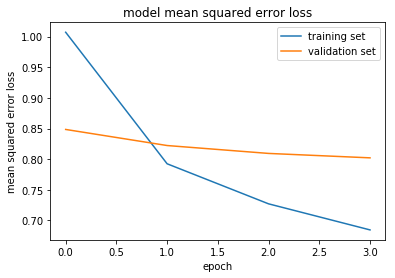

In [27]:
### plot the training and validation loss for each epoch
plt.plot(history_object.history['loss'])
plt.plot(history_object.history['val_loss'])
plt.title('model mean squared error loss')
plt.ylabel('mean squared error loss')
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'], loc='upper right')
plt.show()

# Generators 

``` 

import os
import csv

path = '...' 

samples = []
with open(path+'/...') as file:
    reader = csv.reader(file)
    for line in reader: 
        samples.append(line)
             
from sklearn.model_selection import train_test_split
train_samp, val_samp = train_test_split(samples, test_size=.2)

import cv2
import numpy as np
import sklearn

def generator(samples, batch_size=32):
    while True: 
        shuffle(samples)
        for start in range(0, len(samples), batch_size): 
            batch_samples = samples[start:start+batch_size]
            
            images = []
            angles = []
            
            for batch_sample in batch_samples:
                name = path+'/IMG/'+batch_sample[0].split('/')[-1]
                center_image = cv2.imread(name)
                center_angle=float(batch_sample[3])
                images.append(center_image)
                angles.append(center_angle)
            
            X_train = np.array(images)
            y_train = np.array(angles)
            yield sklearn.utils.shuffle(X_train, y_train)
            
batch_size=...

train_generator = generator(train_samples, batch_size=batch_size)
valid_generator = generator(validation_samples, batch_size=batch_size)

ch, row, col = 3, 160, 320

model = Sequential()

model.add(keras.layers.Cropping2D(cropping=((50, 25), (0, 0)), input_shape=(160,320,3)))

model.add(keras.layers.Lambda(lambda x: (x/255.0)-.5))

model.add(...) 

model.compile(loss='mse', optimizer='adam')
model.fit_generator(train_generator, /
            steps_per_epoch=ceil(len(train_samples)/batch_size), /
            validation_data=validation_generator, /
            validation_steps=ceil(len(validation_samples)/batch_size), /
            epochs=5, verbose=1)
            
```